In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [4]:
def select_size(results_df, size):
    return results_df[results_df['model'].str.endswith(size)]

In [5]:
def plot_3a(data):
    ax = sns.lmplot(x='ratio', y='val_accuracy', hue='model', data=data, line_kws={'linewidth': 1.5})
    ax.set(xlim=(0.08, 0.92))
    return ax

In [18]:
def plot_3b(data, ylim=None):
    ax = sns.lmplot(x='epochs', y='val_accuracy', hue='model', data=data, line_kws={'linewidth': 1.5})
    if ylim is not None:
        ax.set(ylim=ylim)
    return ax

In [22]:
dataset = 'fashion_mnist'

In [13]:
results_3a_svm = pd.read_csv(f'{dataset}/csv/3a_svm.csv')
results_3a_svm = results_3a_svm[1::2]

results_3a_cnn = pd.read_csv(f'{dataset}/csv/3a_cnn.csv')

results_3b_cnn = pd.read_csv(f'{dataset}/csv/3b_cnn.csv')

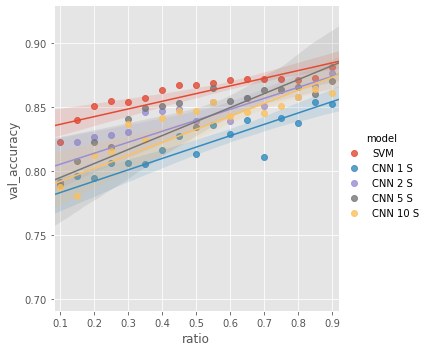

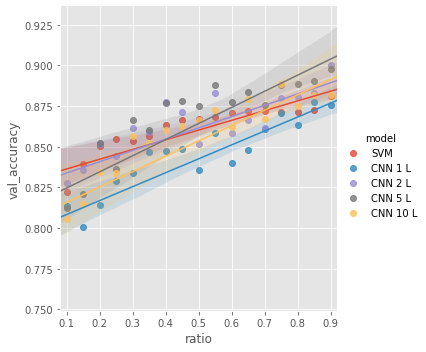

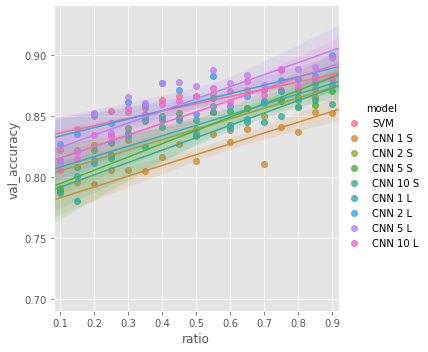

In [14]:
plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'S')
))).savefig(f'{dataset}/plots/3a/comparision_S.svg')

plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'L')
))).savefig(f'{dataset}/plots/3a/comparision_L.svg')

plot_3a(pd.concat((
    results_3a_svm,
    results_3a_cnn,
))).savefig(f'{dataset}/plots/3a/comparision_all.svg')

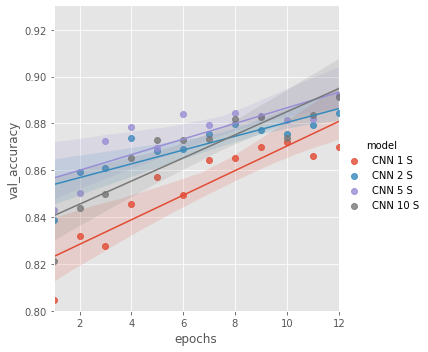

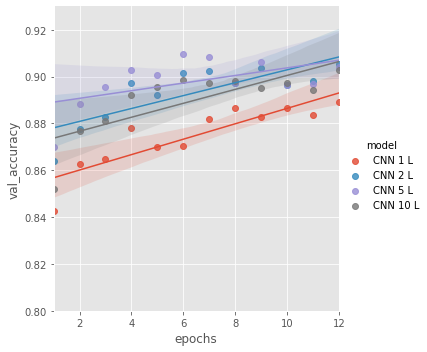

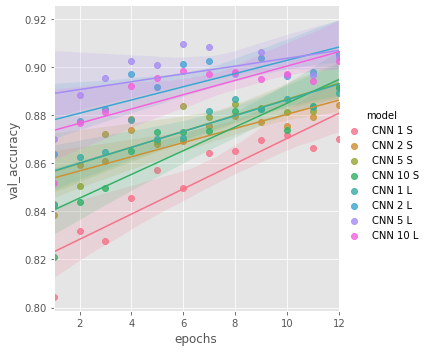

In [23]:
plot_3b(select_size(results_3b_cnn, 'S'), ylim=(0.8, 0.93)).savefig(f'{dataset}/plots/3b/comparision_S.svg')
plot_3b(select_size(results_3b_cnn, 'L'), ylim=(0.8, 0.93)).savefig(f'{dataset}/plots/3b/comparision_L.svg')
plot_3b(results_3b_cnn).savefig(f'{dataset}/plots/3b/comparision_all.svg')